In [ ]:
#计算每个城市的数据
#Calculate data for each city

import pandas as pd
import osmnx as ox
import traceback
import os
# 定义文件路径
excel_file = 'GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.xls'
csv_file = 'GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.csv'
outfile = 'errors.csv'
output_path = 'output'  
# 检查Excel文件是否存在
if not os.path.isfile(excel_file):
    raise FileNotFoundError(f"The file {excel_file} does not exist.")

# 将Excel文件转换为CSV文件
df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False)

# 读取转换后的CSV文件
df = pd.read_csv(csv_file)

# 打印前几行数据以确保正确读取
print(df.head())

# 打开错误日志文件
with open(outfile, "w") as f:
    # 遍历每一行数据
    for row in df.itertuples(index=False):
        try:
            # 获取城市标识符和名称
            strc = getattr(row, 'ID_HDC_G0')
            strc = getattr(row, 'UC_NM_MN')[:-6] + "," + getattr(row, 'CTR_MN_NM')
            print(f"Processing city: {strc}")
            
            # 获取每个城市的边界框
            north = getattr(row, 'BBX_LATMX')
            south = getattr(row, 'BBX_LATMN')
            east = getattr(row, 'BBX_LONMX')
            west = getattr(row, 'BBX_LONMN')

            # 从OSMnx下载街道网络
            G = ox.graph_from_bbox(north, south, east, west, network_type='drive', simplify=True)
            
            # 进一步清理
            multi_di_graph_utm = ox.project_graph(G)
            multi_di_graph_cons = ox.consolidate_intersections(multi_di_graph_utm, tolerance=10, dead_ends=False)
            
            # 如果需要，可以保存图形
            # ox.save_graphml(multi_di_graph_cons, filepath=f"{output_path}/{strc}.graphml")

        except Exception as e:
            # 记录详细的错误信息
            print(f"Error at {strc}: {e}")
            f.write(f"Error at {strc}: {e}\n")

f.close()


/tmp/ipykernel_135/2875940531.py:20: DtypeWarning: Columns (28,55,59,63,67,75,76,77,78,79,80,81,82,116,117,118,119,121,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


   ID_HDC_G0  QA2_1V  AREA  BBX_LATMN   BBX_LONMN  BBX_LATMX   BBX_LONMX  \
0          1       1   185  21.247683 -158.043016  21.422193 -157.730529   
1          2       2    42 -17.641184 -149.628088 -17.517631 -149.508018   
2          3       1    55  34.858517 -120.475511  34.989334 -120.389183   
3          4       1    48  36.582997 -121.952215  36.635743 -121.811816   
4          5       1    60  34.388220 -119.853855  34.457831 -119.658413   

   GCPNT_LAT   GCPNT_LON         CTR_MN_NM  ...      EX_SS_P90      EX_SS_P00  \
0  21.340678 -157.893497     United States  ...  327680.831522  397443.031445   
1 -17.534103 -149.568053  French Polynesia  ...       0.000000       0.000000   
2  34.923123 -120.434372     United States  ...       0.000000       0.000000   
3  36.607720 -121.882378     United States  ...       0.000000       0.000000   
4  34.427664 -119.743693     United States  ...       0.000000       0.000000   

       EX_SS_P15 EX_EQ19PGA EX_EQ19MMI  EX_EQ19_Q    EX_

/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '164-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: P,French Polynesia


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '72-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Santa,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '977-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Mo,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '672-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Santa B,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Sant,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '517-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: S,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '407-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: ,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '155-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Watso,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '343-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Sa,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Cam,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '155-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Thousan,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1617-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: San ,United States


/opt/conda/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '541-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


Processing city: Los A,United States


In [1]:
#加载以上输出城市街道网络数据
#Load the above output city street network data


import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

def load_graph(graphml_path):
    return ox.load_graphml(graphml_path)

def extract_coordinates(graph):
    nodes, edges = ox.graph_to_gdfs(graph)
    return np.array([nodes.geometry.x, nodes.geometry.y]).T

# 示例：加载城市街道网络数据
output_path = 'output'  # 指定输出路径
city_files = [os.path.join(output_path, file) for file in os.listdir(output_path) if file.endswith('.graphml')]

graphs = [load_graph(file) for file in city_files]
coordinates_list = [extract_coordinates(graph) for graph in graphs]


Fractal Dimension: 1.5060205740322155
Fractal Dimension: 1.4563004738278842
Fractal Dimension: 1.4942752550795397
Fractal Dimension: 1.4474560969539803
Fractal Dimension: 1.4486567735189315
Fractal Dimension: 1.4579728539006598
Fractal Dimension: 1.6800655596669491
Fractal Dimension: 1.4757719090242947
Fractal Dimension: 1.4780242243058608
Fractal Dimension: 1.4742398212447472
Fractal Dimension: 1.4662275084063334
Fractal Dimension: 1.5190427437289842
Fractal Dimension: 1.3102534102239272


/tmp/ipykernel_776/1903248935.py:66: RuntimeWarning: divide by zero encountered in scalar power
  Nq += S**q


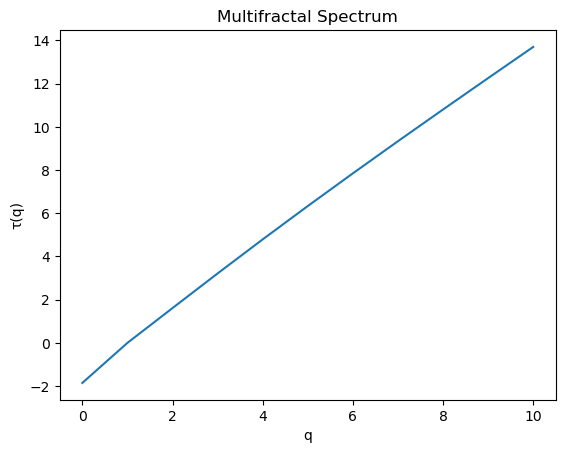

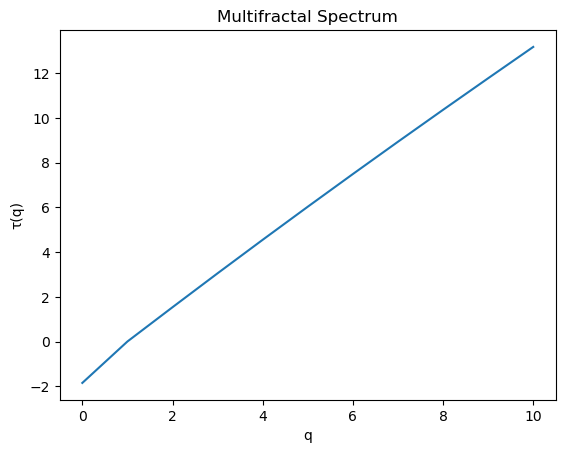

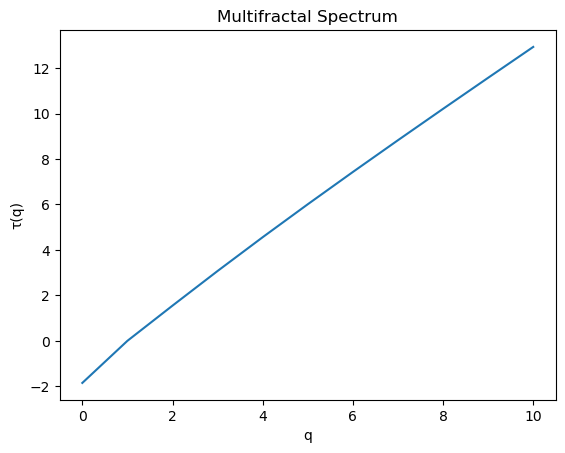

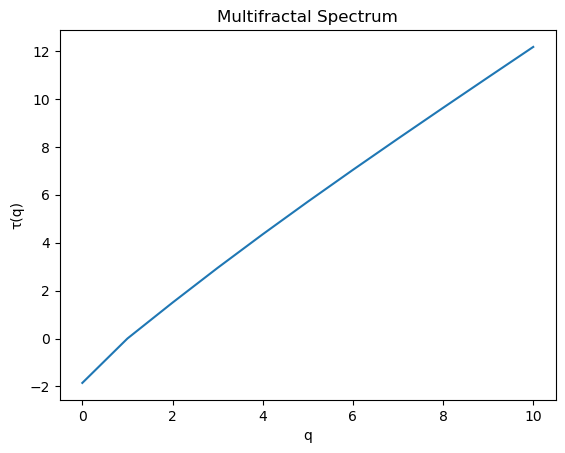

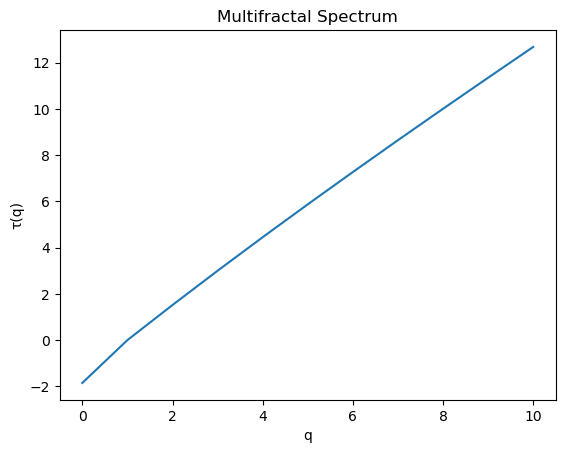

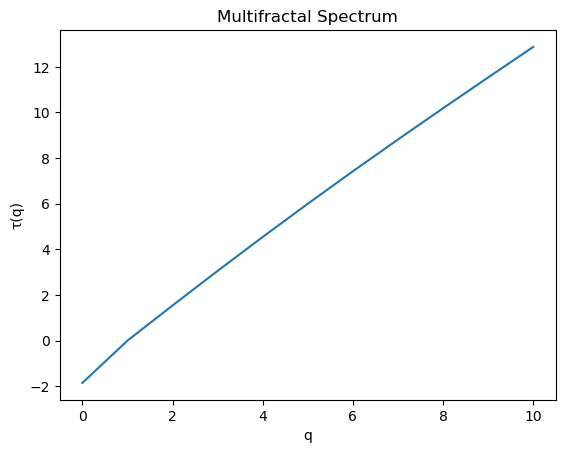

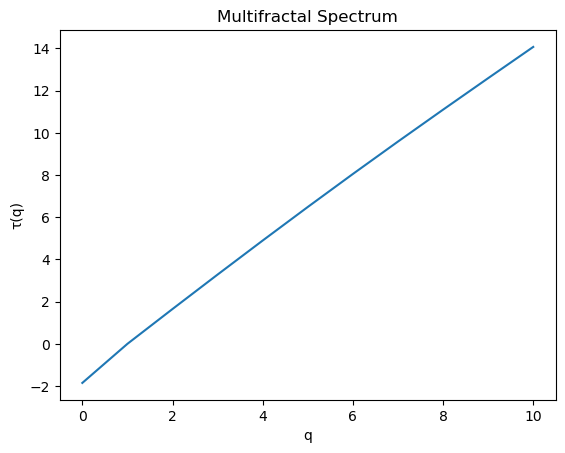

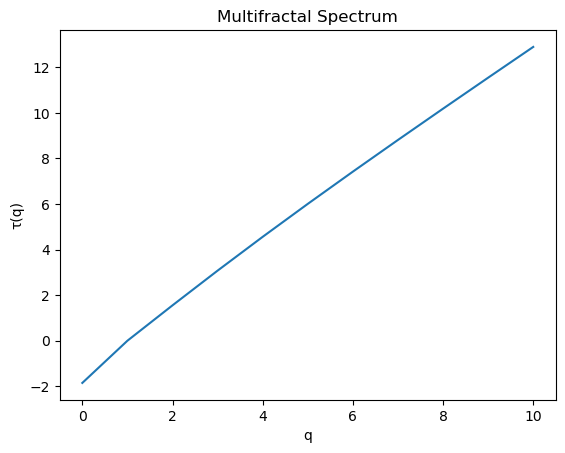

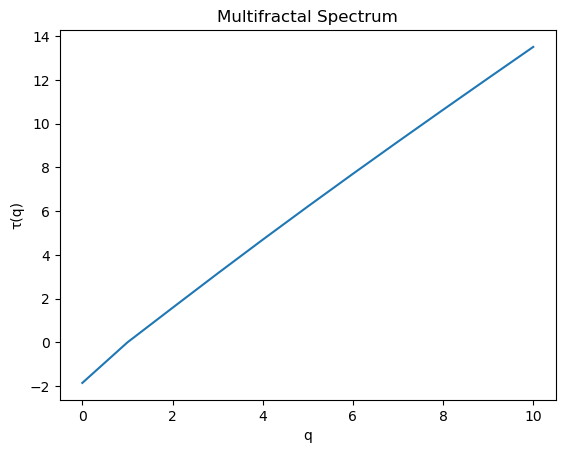

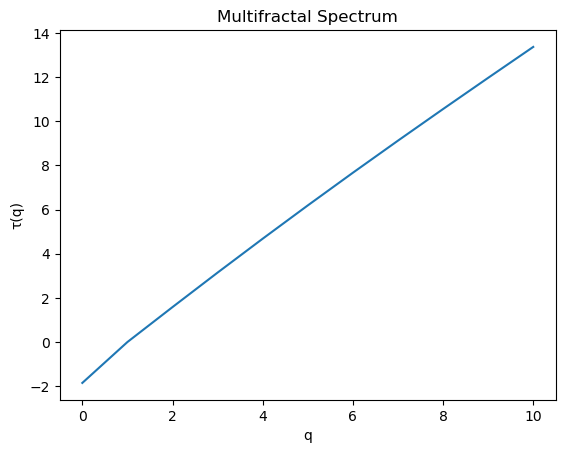

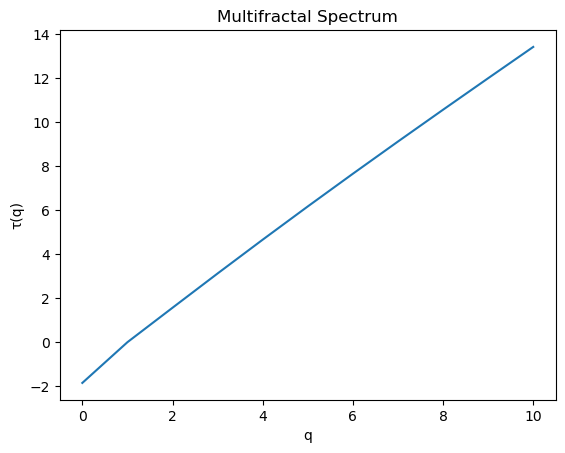

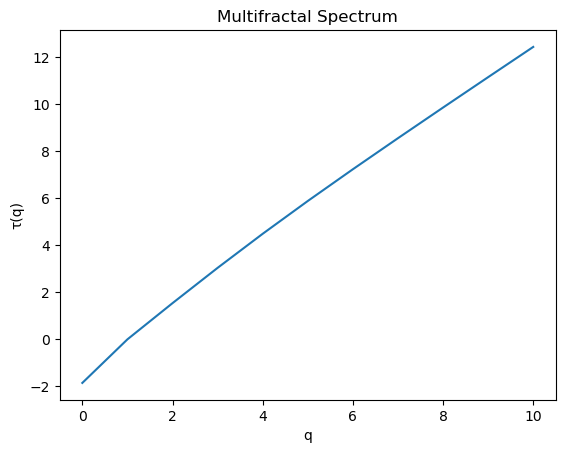

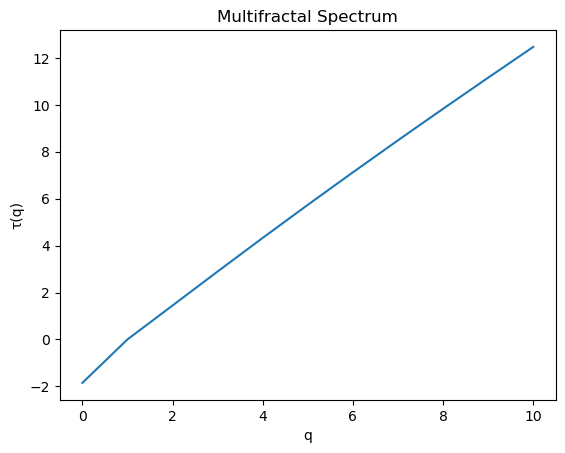

In [2]:
#计算分形维数和多重分形谱
#Calculate fractal dimensions and multifractal spectra


import pandas as pd
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import os

def load_graph(graphml_path):
    return ox.load_graphml(graphml_path)

def extract_coordinates(graph):
    nodes, edges = ox.graph_to_gdfs(graph)
    return np.array([nodes.geometry.x, nodes.geometry.y]).T

# 示例：加载城市街道网络数据
output_path = 'output'  # 指定输出路径
city_files = [os.path.join(output_path, file) for file in os.listdir(output_path) if file.endswith('.graphml')]

graphs = [load_graph(file) for file in city_files]
coordinates_list = [extract_coordinates(graph) for graph in graphs]

def box_count(Z, box_size):
    N = 0
    for i in range(0, Z.shape[0], box_size):
        for j in range(0, Z.shape[1], box_size):
            if np.sum(Z[i:i+box_size, j:j+box_size]) > 0:
                N += 1
    return N

def fractal_dimension(Z, box_sizes):
    counts = []
    for box_size in box_sizes:
        counts.append(box_count(Z, box_size))
    counts = np.array(counts)
    
    # 忽略0或负值
    nonzero_counts = counts > 0
    counts = counts[nonzero_counts]
    box_sizes = box_sizes[nonzero_counts]
    
    coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
    return -coeffs[0]

def create_grid(coordinates, grid_size):
    min_x, min_y = np.min(coordinates, axis=0)
    max_x, max_y = np.max(coordinates, axis=0)
    x_bins = np.linspace(min_x, max_x, grid_size)
    y_bins = np.linspace(min_y, max_y, grid_size)
    return np.histogramdd(coordinates, bins=[x_bins, y_bins])[0]

# 示例：计算每个城市的分形维数
grid_size = 256
box_sizes = np.arange(1, grid_size//2, 2)

fractal_dimensions = []
for coordinates in coordinates_list:
    Z = create_grid(coordinates, grid_size)
    D = fractal_dimension(Z, box_sizes)
    fractal_dimensions.append(D)
    print(f"Fractal Dimension: {D}")

def generalized_box_count(Z, box_size, q):
    Nq = 0
    for i in range(0, Z.shape[0], box_size):
        for j in range(0, Z.shape[1], box_size):
            S = np.sum(Z[i:i+box_size, j:j+box_size])
            Nq += S**q
    return Nq

def multifractal_spectrum(Z, box_sizes, q_range):
    spectrum = []
    for q in q_range:
        counts = []
        for box_size in box_sizes:
            counts.append(generalized_box_count(Z, box_size, q))
        counts = np.array(counts)
        
        # 忽略0或负值
        nonzero_counts = counts > 0
        counts = counts[nonzero_counts]
        box_sizes = box_sizes[nonzero_counts]
        
        tau = np.polyfit(np.log(box_sizes), np.log(counts), 1)[0]
        spectrum.append(tau)
    return np.array(spectrum)

# 示例：计算每个城市的多重分形谱
q_range = np.linspace(-10, 10, 21)
multifractal_spectra = []
for coordinates in coordinates_list:
    Z = create_grid(coordinates, grid_size)
    spectrum = multifractal_spectrum(Z, box_sizes, q_range)
    multifractal_spectra.append(spectrum)
    plt.plot(q_range, spectrum, label='Multifractal Spectrum')
    plt.xlabel('q')
    plt.ylabel('τ(q)')
    plt.title('Multifractal Spectrum')
    plt.show()

/tmp/ipykernel_776/1512025504.py:60: RuntimeWarning: divide by zero encountered in scalar power
  Nq += S**q


DBSCAN with eps=1.5, min_samples=2
Clusters found: 2
City 1, Cluster -1
City 2, Cluster 0
City 3, Cluster -1
City 4, Cluster -1
City 5, Cluster -1
City 6, Cluster 0
City 7, Cluster -1
City 8, Cluster 0
City 9, Cluster 1
City 10, Cluster -1
City 11, Cluster 1
City 12, Cluster -1
City 13, Cluster -1


/opt/conda/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [ 1  2  3  4  5  6  7  8  9 10]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


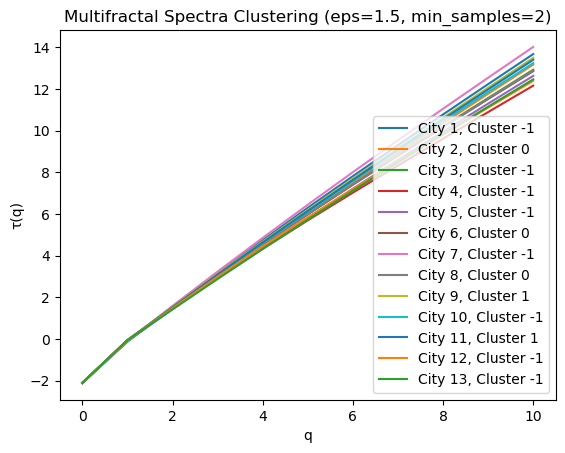

DBSCAN with eps=1.5, min_samples=3
Clusters found: 1
City 1, Cluster -1
City 2, Cluster 0
City 3, Cluster -1
City 4, Cluster -1
City 5, Cluster -1
City 6, Cluster 0
City 7, Cluster -1
City 8, Cluster 0
City 9, Cluster -1
City 10, Cluster -1
City 11, Cluster -1
City 12, Cluster -1
City 13, Cluster -1


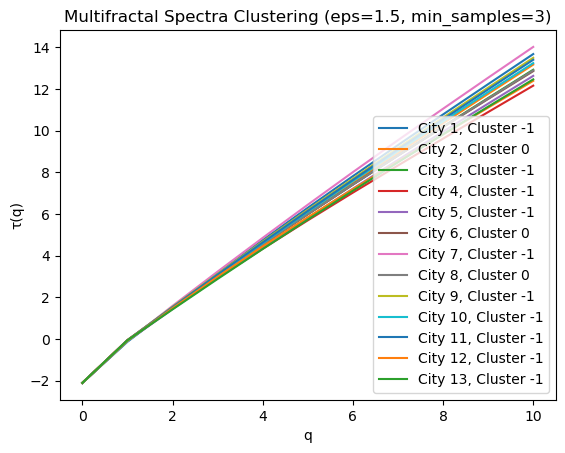

DBSCAN with eps=1.5, min_samples=4
Clusters found: 0
City 1, Cluster -1
City 2, Cluster -1
City 3, Cluster -1
City 4, Cluster -1
City 5, Cluster -1
City 6, Cluster -1
City 7, Cluster -1
City 8, Cluster -1
City 9, Cluster -1
City 10, Cluster -1
City 11, Cluster -1
City 12, Cluster -1
City 13, Cluster -1


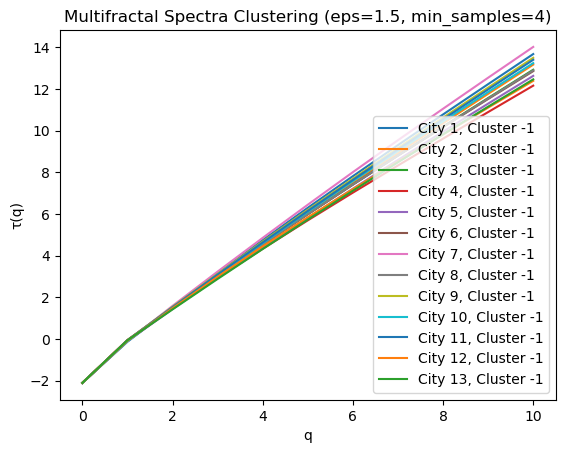

DBSCAN with eps=3, min_samples=2
Clusters found: 1
City 1, Cluster 0
City 2, Cluster 0
City 3, Cluster 0
City 4, Cluster 0
City 5, Cluster 0
City 6, Cluster 0
City 7, Cluster -1
City 8, Cluster 0
City 9, Cluster 0
City 10, Cluster 0
City 11, Cluster 0
City 12, Cluster 0
City 13, Cluster 0


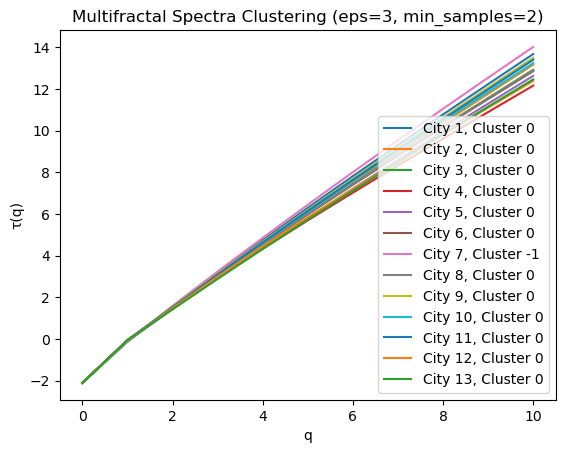

DBSCAN with eps=3, min_samples=3
Clusters found: 1
City 1, Cluster 0
City 2, Cluster 0
City 3, Cluster 0
City 4, Cluster 0
City 5, Cluster 0
City 6, Cluster 0
City 7, Cluster -1
City 8, Cluster 0
City 9, Cluster 0
City 10, Cluster 0
City 11, Cluster 0
City 12, Cluster 0
City 13, Cluster 0


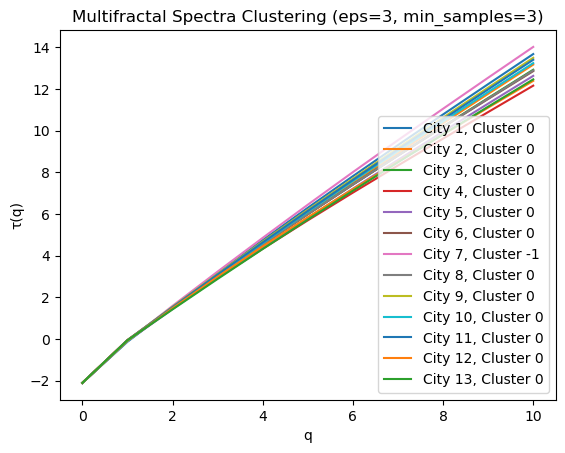

DBSCAN with eps=3, min_samples=4
Clusters found: 1
City 1, Cluster 0
City 2, Cluster 0
City 3, Cluster 0
City 4, Cluster 0
City 5, Cluster 0
City 6, Cluster 0
City 7, Cluster -1
City 8, Cluster 0
City 9, Cluster 0
City 10, Cluster 0
City 11, Cluster 0
City 12, Cluster 0
City 13, Cluster 0


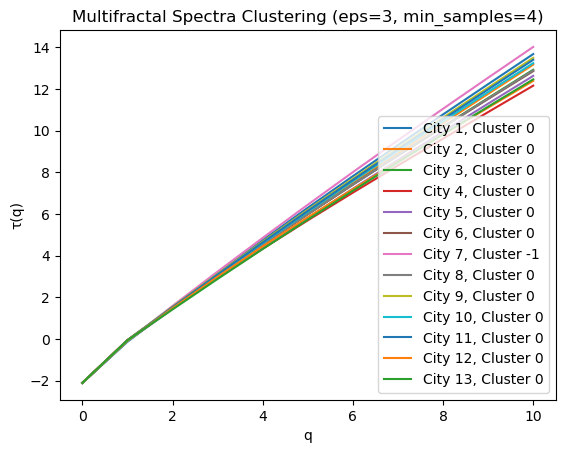

DBSCAN with eps=4.5, min_samples=2
Clusters found: 1
City 1, Cluster 0
City 2, Cluster 0
City 3, Cluster 0
City 4, Cluster 0
City 5, Cluster 0
City 6, Cluster 0
City 7, Cluster 0
City 8, Cluster 0
City 9, Cluster 0
City 10, Cluster 0
City 11, Cluster 0
City 12, Cluster 0
City 13, Cluster 0


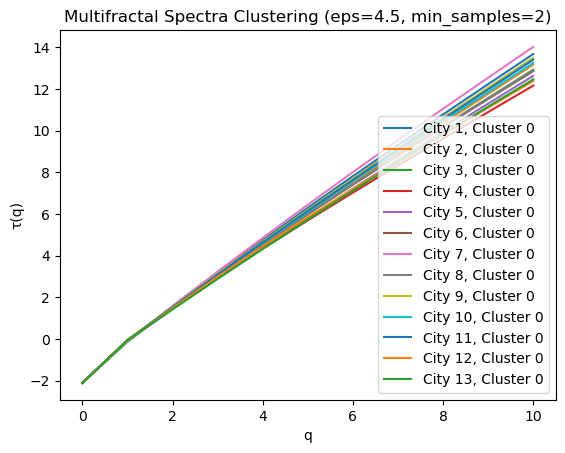

DBSCAN with eps=4.5, min_samples=3
Clusters found: 1
City 1, Cluster 0
City 2, Cluster 0
City 3, Cluster 0
City 4, Cluster 0
City 5, Cluster 0
City 6, Cluster 0
City 7, Cluster 0
City 8, Cluster 0
City 9, Cluster 0
City 10, Cluster 0
City 11, Cluster 0
City 12, Cluster 0
City 13, Cluster 0


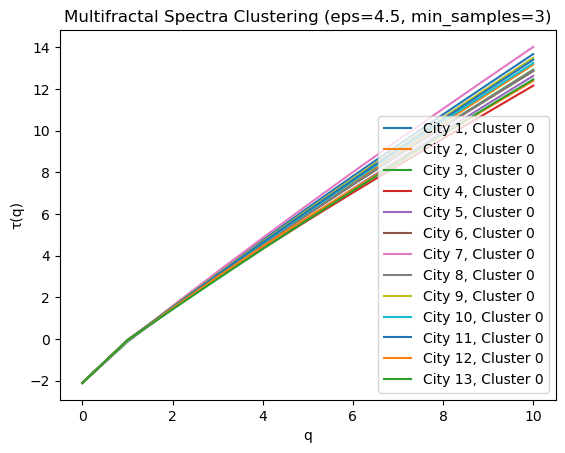

DBSCAN with eps=4.5, min_samples=4
Clusters found: 1
City 1, Cluster 0
City 2, Cluster 0
City 3, Cluster 0
City 4, Cluster 0
City 5, Cluster 0
City 6, Cluster 0
City 7, Cluster 0
City 8, Cluster 0
City 9, Cluster 0
City 10, Cluster 0
City 11, Cluster 0
City 12, Cluster 0
City 13, Cluster 0


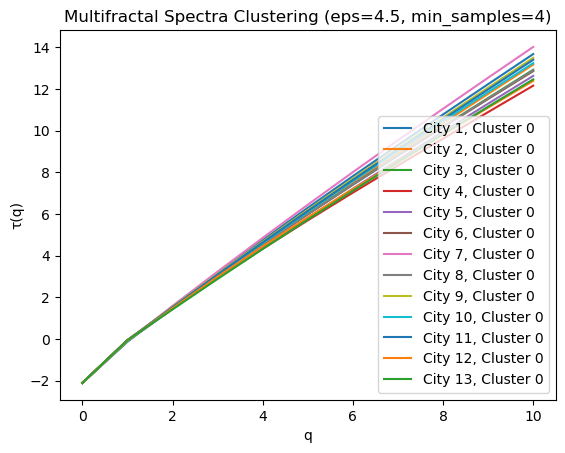

In [3]:
#基于分形维数和多重分形谱用DBSCAN进行聚类
#Clustering with DBSCAN based on fractal dimension and multifractal spectrum


import pandas as pd
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer

def load_graph(graphml_path):
    return ox.load_graphml(graphml_path)

def extract_coordinates(graph):
    nodes, edges = ox.graph_to_gdfs(graph)
    return np.array([nodes.geometry.x, nodes.geometry.y]).T

# 加载城市街道网络数据
output_path = 'output'  # 指定输出路径
city_files = [os.path.join(output_path, file) for file in os.listdir(output_path) if file.endswith('.graphml')]

graphs = [load_graph(file) for file in city_files]
coordinates_list = [extract_coordinates(graph) for graph in graphs]

def box_count(Z, box_size):
    N = 0
    for i in range(0, Z.shape[0], box_size):
        for j in range(0, Z.shape[1], box_size):
            if i + box_size <= Z.shape[0] and j + box_size <= Z.shape[1]:  # 确保索引不超出边界
                if np.sum(Z[i:i+box_size, j:j+box_size]) > 0:
                    N += 1
    return N

def fractal_dimension(Z, box_sizes):
    counts = []
    for box_size in box_sizes:
        counts.append(box_count(Z, box_size))
    counts = np.array(counts)
    
    # 忽略0或负值
    nonzero_counts = counts > 0
    counts = counts[nonzero_counts]
    box_sizes = box_sizes[nonzero_counts]
    
    coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
    return -coeffs[0]

def create_grid(coordinates, grid_size):
    min_x, min_y = np.min(coordinates, axis=0)
    max_x, max_y = np.max(coordinates, axis=0)
    x_bins = np.linspace(min_x, max_x, grid_size)
    y_bins = np.linspace(min_y, max_y, grid_size)
    return np.histogramdd(coordinates, bins=[x_bins, y_bins])[0]

def generalized_box_count(Z, box_size, q):
    Nq = 0
    for i in range(0, Z.shape[0], box_size):
        for j in range(0, Z.shape[1], box_size):
            if i + box_size <= Z.shape[0] and j + box_size <= Z.shape[1]:  # 确保索引不超出边界
                S = np.sum(Z[i:i+box_size, j:j+box_size])
                Nq += S**q
    return Nq

def multifractal_spectrum(Z, box_sizes, q_range):
    spectrum = []
    for q in q_range:
        counts = []
        for box_size in box_sizes:
            counts.append(generalized_box_count(Z, box_size, q))
        counts = np.array(counts)
        
        # 忽略0或负值
        nonzero_counts = counts > 0
        counts = counts[nonzero_counts]
        box_sizes = box_sizes[nonzero_counts]
        
        tau = np.polyfit(np.log(box_sizes), np.log(counts), 1)[0]
        spectrum.append(tau)
    return np.array(spectrum)

# 计算每个城市的分形维数和多重分形谱
grid_size = 256
box_sizes = np.arange(1, grid_size//2, 2)
q_range = np.linspace(-10, 10, 21)

features = []
for coordinates in coordinates_list:
    Z = create_grid(coordinates, grid_size)
    D = fractal_dimension(Z, box_sizes)
    spectrum = multifractal_spectrum(Z, box_sizes, q_range)
    features.append(np.append(D, spectrum))

# 转换为DataFrame进行聚类
df_features = pd.DataFrame(features)

# 使用SimpleImputer处理NaN值
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_features)

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 调整DBSCAN参数
eps_values = [1.5, 3, 4.5]
min_samples_values = [2, 3, 4]

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"DBSCAN with eps={eps}, min_samples={min_samples}")
        # 使用DBSCAN进行聚类分析
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # 聚类结果
        unique_labels = set(labels)
        print(f"Clusters found: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
        for i, label in enumerate(labels):
            print(f"City {i+1}, Cluster {label}")

        # 可视化聚类结果
        for i in range(len(city_files)):
            plt.plot(q_range, features[i][1:], label=f'City {i+1}, Cluster {labels[i]}')
        plt.xlabel('q')
        plt.ylabel('τ(q)')
        plt.title(f'Multifractal Spectra Clustering (eps={eps}, min_samples={min_samples})')
        plt.legend()
        plt.show()


In [12]:
#结合所有其他特征进行聚类
#Combine all other features for clustering

In [13]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from shapely.geometry import LineString
from scipy.spatial.distance import euclidean


In [14]:
#加载和提取街道网络数据
#Load and extract street network data
def load_graph(graphml_path):
    return ox.load_graphml(graphml_path)

def extract_coordinates(graph):
    nodes, edges = ox.graph_to_gdfs(graph)
    return np.array([nodes.geometry.x, nodes.geometry.y]).T


In [15]:
#计算几何指标
#Calculate geometric index

def calculate_geometric_metrics(G):
    # 检查是否已投影，如果未投影则进行投影
    if not ox.projection.is_projected(ox.graph_to_gdfs(G, nodes=False, edges=True).crs):
        G_projected = ox.project_graph(G)
    else:
        G_projected = G
    
    # 街道总长度
    street_lengths = ox.utils_graph.graph_to_gdfs(G_projected, nodes=False, edges=True)['length']
    total_street_length = street_lengths.sum()
    
    # 街道交叉口数量（手动处理交叉口合并）
    nodes, edges = ox.graph_to_gdfs(G_projected)
    intersection_count = nodes['geometry'].nunique()
    
    # 街道曲率
    def calculate_curvature(line):
        # 计算边的曲率
        coords = list(line.coords)
        if len(coords) < 3:
            return 0
        start, mid, end = coords[0], coords[len(coords) // 2], coords[-1]
        start_end_dist = euclidean(start, end)
        if start_end_dist == 0:
            return 0
        return (euclidean(start, mid) + euclidean(mid, end)) / start_end_dist - 1
    
    mean_curvature = np.mean([calculate_curvature(edge) for edge in edges['geometry']])
    
    return total_street_length, intersection_count, mean_curvature


In [16]:
#计算拓扑指标
#Calculate topology index

def calculate_topological_metrics(G):
    G_undirected = G.to_undirected()
    
    # 网络连接性
    connected_components = list(nx.connected_components(G_undirected))
    num_connected_components = len(connected_components)
    
    # 社区结构
    communities = nx.community.girvan_newman(G_undirected)
    first_level_communities = next(communities)
    community_count = len(first_level_communities)
    
    # 介数中心性
    betweenness_centrality = nx.betweenness_centrality(G_undirected)
    mean_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
    
    # 接近中心性
    closeness_centrality = nx.closeness_centrality(G_undirected)
    mean_closeness_centrality = np.mean(list(closeness_centrality.values()))
    
    # 网络直径
    if nx.is_connected(G_undirected):
        diameter = nx.diameter(G_undirected)
    else:
        diameter = None
    
    return num_connected_components, community_count, mean_betweenness_centrality, mean_closeness_centrality, diameter


In [17]:
#计算分形维数和多重分形谱
# calculate fractal dimension and multifractal spectra
def box_count(Z, box_size):
    N = 0
    for i in range(0, Z.shape[0], box_size):
        for j in range(0, Z.shape[1], box_size):
            # 修正索引范围，避免超出边界
            if i + box_size <= Z.shape[0] and j + box_size <= Z.shape[1]:
                if np.sum(Z[i:i+box_size, j:j+box_size]) > 0:
                    N += 1
    return N

def fractal_dimension(Z, box_sizes):
    counts = []
    for box_size in box_sizes:
        counts.append(box_count(Z, box_size))
    counts = np.array(counts)
    
    # 忽略0或负值
    nonzero_counts = counts > 0
    counts = counts[nonzero_counts]
    box_sizes = box_sizes[nonzero_counts]
    
    coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
    return -coeffs[0]

def create_grid(coordinates, grid_size):
    min_x, min_y = np.min(coordinates, axis=0)
    max_x, max_y = np.max(coordinates, axis=0)
    x_bins = np.linspace(min_x, max_x, grid_size)
    y_bins = np.linspace(min_y, max_y, grid_size)
    return np.histogramdd(coordinates, bins=[x_bins, y_bins])[0]

def generalized_box_count(Z, box_size, q):
    Nq = 0
    for i in range(0, Z.shape[0], box_size):
        for j in range(0, Z.shape[1], box_size):
            # 修正索引范围，避免超出边界
            if i + box_size <= Z.shape[0] and j + box_size <= Z.shape[1]:
                S = np.sum(Z[i:i+box_size, j:j+box_size])
                Nq += S**q
    return Nq

def multifractal_spectrum(Z, box_sizes, q_range):
    spectrum = []
    for q in q_range:
        counts = []
        for box_size in box_sizes:
            counts.append(generalized_box_count(Z, box_size, q))
        counts = np.array(counts)
        
        # 忽略0或负值
        nonzero_counts = counts > 0
        counts = counts[nonzero_counts]
        box_sizes = box_sizes[nonzero_counts]
        
        tau = np.polyfit(np.log(box_sizes), np.log(counts), 1)[0]
        spectrum.append(tau)
    return np.array(spectrum)


In [ ]:
#计算所有特征并进行聚类分析
#calculate all features for clustering

# 加载城市街道网络数据
output_path = 'output'  # 指定输出路径
city_files = [os.path.join(output_path, file) for file in os.listdir(output_path) if file.endswith('.graphml')]

graphs = [load_graph(file) for file in city_files]
coordinates_list = [extract_coordinates(graph) for graph in graphs]

# 计算特征
grid_size = 256
box_sizes = np.arange(1, grid_size//2, 2)
q_range = np.linspace(-10, 10, 21)

features = []
for G, coordinates in zip(graphs, coordinates_list):
    # 几何指标
    total_street_length, intersection_count, mean_curvature = calculate_geometric_metrics(G)
    
    # 拓扑指标
    num_connected_components, community_count, mean_betweenness_centrality, mean_closeness_centrality, diameter = calculate_topological_metrics(G)
    
    # 分形维数和多重分形谱
    Z = create_grid(coordinates, grid_size)
    D = fractal_dimension(Z, box_sizes)
    spectrum = multifractal_spectrum(Z, box_sizes, q_range)
    
    # 组合所有特征
    feature_vector = np.concatenate([
        [total_street_length, intersection_count, mean_curvature],
        [num_connected_components, community_count, mean_betweenness_centrality, mean_closeness_centrality, diameter if diameter is not None else 0],
        [D],
        spectrum
    ])
    features.append(feature_vector)

# 转换为DataFrame进行聚类
df_features = pd.DataFrame(features)

# 使用SimpleImputer处理NaN值
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_features)

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 使用DBSCAN进行聚类分析
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(X_scaled)

# 聚类结果
for i, label in enumerate(labels):
    print(f"City {i+1}, Cluster {label}")

# 可视化聚类结果
for i in range(len(city_files)):
    plt.plot(q_range, features[i][-len(q_range):], label=f'City {i+1}, Cluster {labels[i]}')
plt.xlabel('q')
plt.ylabel('τ(q)')
plt.title('Multifractal Spectra Clustering')
plt.legend()
plt.show()
